In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
data = pd.read_csv("./data/Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum() / len(data) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
data=data.drop('Cabin', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [10]:
# 최빈값
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# 이상값 탐지 describe()

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 척도의 종류(자료의 종류)
| 척도 구분    | 특징 | 예시 | 타이타닉 데이터 예시 |
|:------------|:----|:----|:----------------|
| 명목척도 (Nominal Scale) | - 분류만 가능<br>- 서열 없음<br>- 수학적 연산 불가 | 성별, 지역, 혈액형, 선호도 등 | - 성별 (male, female)<br>- 승선 항구 (C, Q, S) |
| 순서척도 (Ordinal Scale) | - 분류 가능 + 서열 있음<br>- 크기 차이는 불명확<br>- 덧셈, 뺄셈 불가 | 선호도(1순위, 2순위...), 학년, 고객 만족도 등 | - 선실 등급 (1st, 2nd, 3rd) |
| 구간척도 (Interval Scale) | - 분류 가능 + 서열 있음 + 간격 의미 있음<br>- 하지만 절대 0이 없음<br>- 비율 계산 불가 | 온도(섭씨), 지수(지능지수 IQ 등) | (타이타닉에는 구간척도 예시는 특별히 없음)<br>- 가상의 예로 "탑승객 만족 점수 (0~100 점)" |
| 비율척도 (Ratio Scale) | - 분류 가능 + 서열 있음 + 간격 의미 + 절대 0 존재<br>- 사칙연산 모두 가능 (비율 연산 가능) | 키, 몸무게, 나이, 수입, 점수 | - 나이 (Age)<br>- 운임 요금 (Fare)<br>- 형제/배우자 수 (SibSp), 부모/자식 수 (Parch) |

| 변수명  | 척도 종류 | 이유 |
|:-------|:---------|:-----|
| Sex (성별) | 명목척도 | 남자, 여자 구분만 가능. 남자가 여자보다 크다거나 작다는 개념 없음. |
| Embarked (승선항구) | 명목척도 | 탑승한 항구(C=쉘버그, Q=퀸스타운, S=사우샘프턴)는 단순 구분일 뿐, 크고 작음이 없음. |
| Pclass (선실 등급) | 순서척도 | 1등실 > 2등실 > 3등실 로 서열은 존재하지만, 1등실과 2등실 간 '차이'가 2등실과 3등실 간 '차이'와 같은지는 알 수 없음. |
| Age (나이) | 비율척도 | 0세가 절대적 기준, 나이의 비율 계산 가능 (20살은 10살의 2배). |
| Fare (운임) | 비율척도 | 0원이 절대적 기준, 100파운드는 50파운드의 2배. |
| SibSp, Parch (형제/배우자, 부모/자식 수) | 비율척도 | 0이 기준이고, 숫자 간 비율 의미 있음. |

# 이상값(outline) 탐지
* 이상값: 데이터 집합에서 다른 값들과 뚜렷하게 다른 값
* 통계적으로 평균을 왜곡시킴, 모델의 결과를 왜곡시킬 수 있음
* 전체 데이터 분포에서 정상 범위에 속하지 않는 데이터

# 이상값 탐지 방법 3가지
* Z-score가 -3 ~ 3 범위를 넘어가는 경우: 극단적인 이상값을 탐지
* 평균을 기준으로 평균에서 ±(3*표준편차)를 넘는 경우: 표준편차가 큰 경우에는 잘 못잡음
* IQR(사분위수) 기준으로 계산한 상위 하위 이상값을 넘는 경우: 정규·비정규분포에서 모두 강함

# Z-score로 이상값 탐지하기
* Z-score: (값-평균)/표준편차
* 평균: .mean()
* 표준편차: .std()

* Fare 컬럼의 z-score 구하기

In [13]:
# 평균과 표준편차를 구해서 z-score 계산하기
mean = data['Fare'].mean()
mean

np.float64(32.204207968574636)

In [15]:
std = data['Fare'].std()
std

np.float64(49.6934285971809)

In [16]:
data['z_score'] = (data['Fare'] - mean) / std
data['z_score']

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: z_score, Length: 891, dtype: float64

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,z_score
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,-0.486064


In [24]:
outliers_1 = data[(data['z_score'] > 3) | (data['z_score'] < -3)]

# 이상값은 원인을 파악해야 하는 값이다.

In [25]:
outliers_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,z_score
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,4.644393
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,4.644393
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C,4.332899
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C,9.661740
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C,4.332899
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C,4.631815
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S,4.644393
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C,3.608038
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C,3.930516
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S,4.644393


In [36]:
outliers_1['Fare'].min()

np.float64(211.3375)

* scipy.stats.zscore를 이용해 z-score 계산하기

In [26]:
from scipy.stats import zscore

In [28]:
data['z_score2'] = zscore(data['Fare'])

In [29]:
data[['z_score', 'z_score2']]

,z_score,z_score2
0,-0.502163,-0.502445
1,0.786404,0.786845
2,-0.488580,-0.488854
3,0.420494,0.420730
4,-0.486064,-0.486337
...,...,...
886,-0.386454,-0.386671
887,-0.044356,-0.044381
888,-0.176164,-0.176263
889,-0.044356,-0.044381


# 평균과 표준편차를 이용해 이상값 찾기 ESD
* 평균±(3표준편차) $ ({\mu\pm 3 \sigma}) $

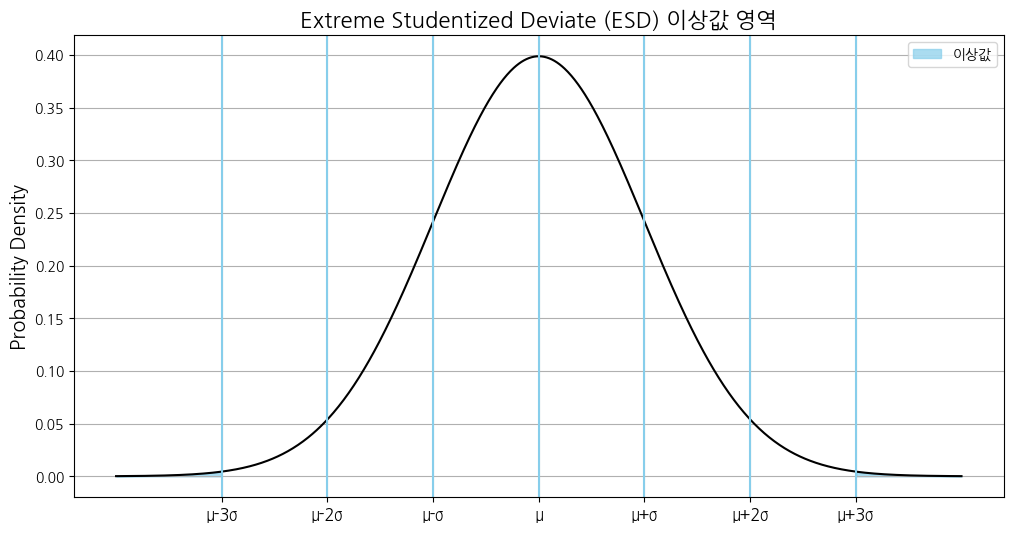

In [30]:
mean_fare = data['Fare'].mean()
std_fare = data['Fare'].std()

In [32]:
lower_bound = mean_fare - (3 * std_fare)
lower_bound

np.float64(-116.87607782296804)

In [33]:
upper_bound = mean_fare + (3 * std_fare)
upper_bound

np.float64(181.2844937601173)

In [34]:
data[data['Fare'] > upper_bound]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,z_score,z_score2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S,4.644393,4.647001
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S,4.644393,4.647001
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C,4.332899,4.335332
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C,9.661740,9.667167
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C,4.332899,4.335332
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C,4.631815,4.634417
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S,4.644393,4.647001
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C,3.608038,3.610065
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C,3.930516,3.932723
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S,4.644393,4.647001


In [35]:
print("z-score 이상치 개수", len(outliers_1))
print("ESD 이상치 개수", len(data[data['Fare'] > upper_bound]))

z-score 이상치 개수 20
ESD 이상치 개수 20


# IQR(사분위수)를 이용한 이상값 탐지
### (1) IQR 이란?
* IQR은 데이터의 중간 50% 구간의 길이를 의미
* IQR은 0, 25, 50, 75, 100
* IQR공식: Q3(75%) - Q1(25%)

### (2) IQR로 이상값을 찾는 이유?
* 평균과 표준편차는 극단적인 값에 민감
* IQR은 중간값 기반이라 극단값(outlier)에 영향을 덜 받음
* 정규분포가 아닌 데이터에서도 이상치를 잘 찾을 수 있음

### (3) IQR 기반 이상값 판정 기준
* 하한값: Q1(25%) - (1.5 * (Q3(75%)-Q1(25%))
* 상한값: Q3(75%) + (1.5 * (Q3(75%)-Q1(25%))

In [37]:
import seaborn as sns

<Axes: ylabel='Fare'>

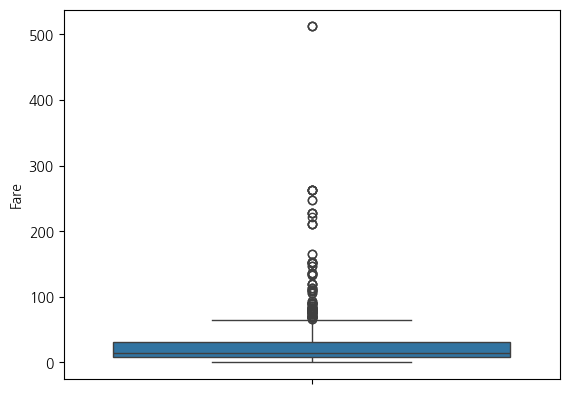

In [38]:
plt.figure()
sns.boxplot(data['Fare'])

In [39]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [41]:
minimun = 7.910400 - (1.5 * (31.000000 - 7.910400))
minimun

-26.724

In [42]:
maximun = 31.000000 + (1.5 * (31.000000 - 7.910400))
maximun

65.6344

In [44]:
fare_desc = data['Fare'].describe()
print(type(fare_desc), fare_desc)

<class 'pandas.core.series.Series'> count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [46]:
fare_desc['25%'] - (1.5 * (fare_desc['75%'] - fare_desc['25%']))

np.float64(-26.724)

In [48]:
fare_desc['75%'] + (1.5 * (fare_desc['75%'] - fare_desc['25%']))

np.float64(65.6344)

<Axes: >

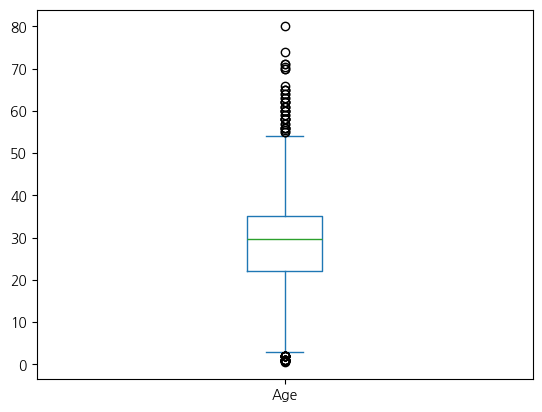

In [50]:
data['Age'].plot(kind='box')

# 이상치 처리 방법 6가지
| 방법 | 설명 | 주의사항 |
|:----|:----|:----|
| 1. 삭제 (제거) | 이상치인 행(row) 삭제 | 데이터 수가 많을 때만 추천 |
| 2. 대체 (수정) | 평균, 중앙값 등으로 이상치 값을 대체 | 대체 값이 데이터의 특성을 망가뜨릴 수 있음 |
| 3. 변환 | 로그(log), 루트(sqrt) 변환해서 이상치 영향을 줄이기 | 주로 오른쪽으로 긴 분포(Skewed Data) |
| 4. 구간 압축 (Winsorization) | 상/하위 극단값을 일정 값으로 '컷' | 통계 왜곡 최소화할 때 사용 |
| 5. 모델링 시 Robust 방법 사용 | 이상치에 강한 모델 사용 (예: RobustScaler, RANSAC) | 이상치를 제거하지 않고 대응 |
| 6. 별도 분석 | 이상치만 따로 분석해서 인사이트 얻기 | 이상치가 중요한 의미를 가질 때 |

<Axes: ylabel='Frequency'>

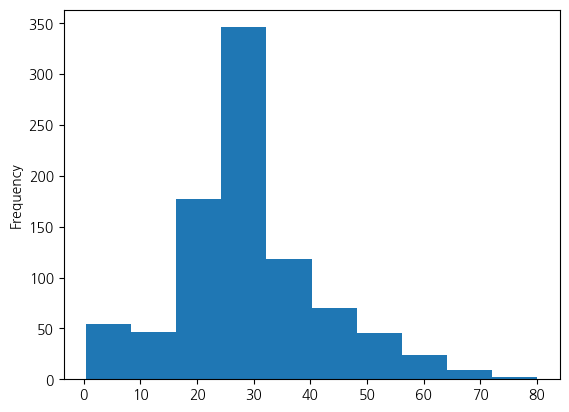

In [51]:
data['Age'].plot(kind='hist')

* Winsorization으로 이상값을 정상범위 최대값으로 조정하기

In [52]:
maximun

65.6344

In [56]:
data.loc[data['Fare'] > maximun, 'Fare'] = maximun

In [58]:
data.loc[data['Fare'] == maximun, 'Fare']

1      65.6344
27     65.6344
31     65.6344
34     65.6344
52     65.6344
        ...   
846    65.6344
849    65.6344
856    65.6344
863    65.6344
879    65.6344
Name: Fare, Length: 116, dtype: float64

In [59]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,z_score,z_score2
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02,8.910000e+02
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,24.046813,-1.196200e-17,3.987333e-18
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,20.481625,1.000000e+00,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,-6.480577e-01,-6.484217e-01
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,-4.888737e-01,-4.891482e-01
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,-3.571902e-01,-3.573909e-01
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,-2.423274e-02,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400,9.661740e+00,9.667167e+00


<Axes: >

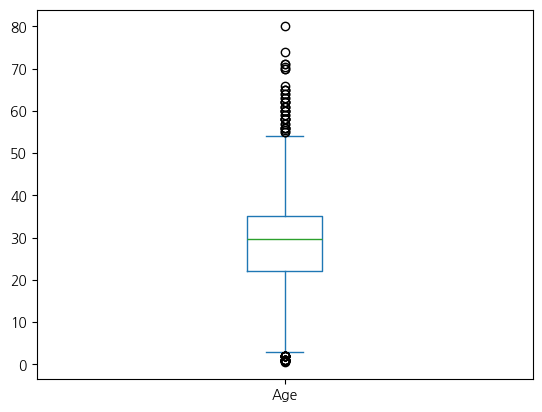

In [60]:
data['Age'].plot(kind='box')